In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Create DataFrame
df = pd.read_csv("Heart Disease data.csv")
df.head()

,Age,Sex,Chest Pain,Resting BPs,Cholestoral,Fasting Blood Sugar,Resting ECG,Mx Heart Rate,Exercise Induced Angina,Oldpeak,Slope of the peak exercise ST segment,No. of Major Vessels Coloured by Flourosopy,Thallium Stress Test,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [50]:
# Checking the missing values
df.isnull().sum()

Age                                            0
Sex                                            0
Chest Pain                                     0
Resting BPs                                    0
Cholestoral                                    0
Fasting Blood Sugar                            0
Resting ECG                                    0
Mx Heart Rate                                  0
Exercise Induced Angina                        0
Oldpeak                                        0
Slope of the peak exercise ST segment          0
No. of Major Vessels Coloured by Flourosopy    0
Thallium Stress Test                           0
Target                                         0
dtype: int64

In [52]:
# transforming categorical variables
df['Sex'] = df['Sex'].map({0:'Female', 1:'Male'})
df['Chest Pain'] = df['Chest Pain'].map({0:'Typical Angina', 1:'Atypical Angina', 2:'Non-Anginal', 3:'Asymptomatic'})
df['Fasting Blood Sugar'] = df['Fasting Blood Sugar'].map({0:'<= 120 mg/dl', 1:'>120 mg/dl'})
df['Resting ECG'] = df['Resting ECG'].map({0:'Normal', 1:'ST-T Wave Abnormallity', 2:'Left Ventricular Hypertrophy'})
df['Exercise Induced Angina'] = df['Exercise Induced Angina'].map({0:'No', 1:'Yes'})
df['Slope of the peak exercise ST segment'] = df['Slope of the peak exercise ST segment'].map({0:'Up-Sloping', 1:'Flat', 2:'Down-Sloping'})
df['Thallium Stress Test'] = df['Thallium Stress Test'].map({0:'Normal', 1:'Fixed Defect', 2:'Reversible Defect'})
df['Target'] = df['Target'].map({0:'No Disease', 1:'Disease'})

df.head()

,Age,Sex,Chest Pain,Resting BPs,Cholestoral,Fasting Blood Sugar,Resting ECG,Mx Heart Rate,Exercise Induced Angina,Oldpeak,Slope of the peak exercise ST segment,No. of Major Vessels Coloured by Flourosopy,Thallium Stress Test,Target
0,52,Male,Typical Angina,125,212,<= 120 mg/dl,ST-T Wave Abnormallity,168,No,1.0,Down-Sloping,2,NaN,No Disease
1,53,Male,Typical Angina,140,203,>120 mg/dl,Normal,155,Yes,3.1,Up-Sloping,0,NaN,No Disease
2,70,Male,Typical Angina,145,174,<= 120 mg/dl,ST-T Wave Abnormallity,125,Yes,2.6,Up-Sloping,0,NaN,No Disease
3,61,Male,Typical Angina,148,203,<= 120 mg/dl,ST-T Wave Abnormallity,161,No,0.0,Down-Sloping,1,NaN,No Disease
4,62,Female,Typical Angina,138,294,>120 mg/dl,ST-T Wave Abnormallity,106,No,1.9,Flat,3,Reversible Defect,No Disease


# Doing EDA process to uncover patterns and relationships

In [53]:
# Statistical summary
df.describe()

,Age,Resting BPs,Cholestoral,Mx Heart Rate,Oldpeak,No. of Major Vessels Coloured by Flourosopy
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.754146
std,9.072290,17.516718,51.59251,23.005724,1.175053,1.030798
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,0.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,4.000000


In [70]:
# select only numeric columns for correlation computation
numeric_df = df.select_dtypes(include='number')

# correlations between numeric attributes
corr = numeric_df.corr()
corr

,Age,Resting BPs,Cholestoral,Mx Heart Rate,Oldpeak,No. of Major Vessels Coloured by Flourosopy
Age,1.000000,0.271121,0.219823,-0.390227,0.208137,0.271551
Resting BPs,0.271121,1.000000,0.127977,-0.039264,0.187434,0.104554
Cholestoral,0.219823,0.127977,1.000000,-0.021772,0.064880,0.074259
Mx Heart Rate,-0.390227,-0.039264,-0.021772,1.000000,-0.349796,-0.207888
Oldpeak,0.208137,0.187434,0.064880,-0.349796,1.000000,0.221816
No. of Major Vessels Coloured by Flourosopy,0.271551,0.104554,0.074259,-0.207888,0.221816,1.000000


In [93]:
# Create a histogram with KDE using Plotly Express
fig = px.histogram(df, x='Age', nbins=30, marginal='violin', title='Age Distribution')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    title_x=0.5)

fig.show()

In [94]:
# Calculate heart disease rates
heart_disease_rates = df['Target'].value_counts(normalize=True) * 100
heart_disease_rates = heart_disease_rates.reset_index()
heart_disease_rates.columns = ['Condition', 'Percentage']

# Create a bar plot using Plotly Express
fig = px.bar(heart_disease_rates, x='Condition', y='Percentage', 
             color='Condition', title='Heart Disease Rates', 
             color_discrete_sequence=px.colors.sequential.Viridis)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Condition',
    yaxis_title='Percentage',
    title_x=0.5)

fig.show()

In [95]:
# Calculate heart disease by gender
heart_disease_by_gender = df.groupby(['Sex', 'Target']).size().reset_index(name='Count')

# Create a stacked bar plot using Plotly Express
fig = px.bar(heart_disease_by_gender, x='Sex', y='Count', color='Target', 
             title='Heart Disease by Gender', 
             color_discrete_sequence=px.colors.sequential.Viridis)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Count',
    title_x=0.5,
    barmode='stack')

fig.show()

In [97]:
# Create a scatter plot using Plotly Express
fig = px.scatter(df, x='Age', y='Cholestoral', color='Target',
                 title='Age vs Cholestoral', 
                 category_orders={'Target': ['No Disease', 'Disease']},
                 color_discrete_sequence=px.colors.sequential.Viridis)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Cholestoral',
    title_x=0.5,
    legend_title='Target')

fig.show()

In [98]:
# Calculate heart disease by age
heart_disease_by_age = df.groupby(['Age', 'Target']).size().reset_index(name='Count')

# Create a stacked bar plot using Plotly Express
fig = px.bar(heart_disease_by_age, x='Age', y='Count', color='Target',
             title='Heart Disease by Age', 
             color_discrete_sequence=px.colors.sequential.Viridis)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    title_x=0.5,
    barmode='stack')

fig.show()

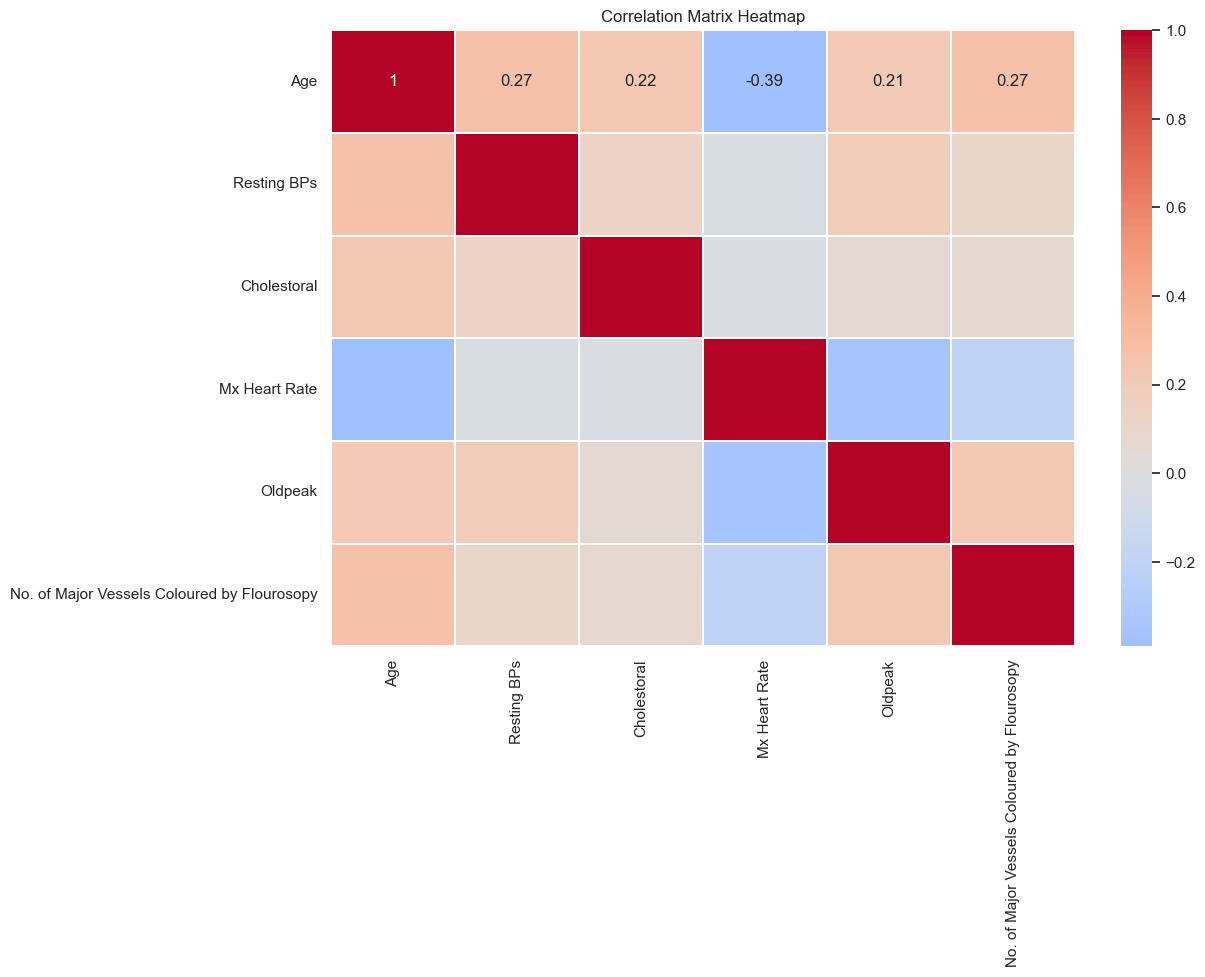

In [71]:
# plot of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.2, center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [89]:
import plotly.express as px

# Create a scatter plot using Plotly Express
fig = px.scatter(df, x='Age', y='Mx Heart Rate', color='Target',
                 category_orders={'Target': ['No Disease', 'Disease']},
                 title='Age vs. Maximum Heart Rate by Target')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Maximum Heart Rate',
    title_x=0.5,
    legend_title='Target'
)

# Show the plot
fig.show()

In [90]:
# count plot using Plotly Express
fig = px.histogram(df, x='Chest Pain', color='Target', barmode='group',
                   category_orders={'Target': ['No Disease', 'Disease']},
                   title='Distribution of Chest Pain Types')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Chest Pain Type',
    yaxis_title='Count',
    title_x=0.5,
    legend_title='Target'
    )
fig.show()

In [86]:
# Create a box plot using Plotly Express
fig = px.box(df, x='Target', y='Cholestoral', 
             category_orders={'Target': ['No Disease', 'Disease']},
             title='Cholestoral Levels by Target')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Target',
    yaxis_title='Cholestoral',
    title_x=0.5,
    legend_title='Target')

fig.show()

In [92]:
# Create a count plot using Plotly Express
fig = px.histogram(df, x='Sex', color='Target', barmode='group',
                   category_orders={'Target': ['No Disease', 'Disease']},
                   title='Heart Disease by Sex')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Sex',
    yaxis_title='Count',
    title_x=0.5,
    legend_title='Target')

fig.show()

In [103]:
# Key Metrics: Display summary statistics
summary_stats = df.describe().transpose()
summary_stats

,count,mean,std,min,25%,50%,75%,max
Age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
Resting BPs,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
Cholestoral,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
Mx Heart Rate,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
Oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2
No. of Major Vessels Coloured by Flourosopy,1025.0,0.754146,1.030798,0.0,0.0,0.0,1.0,4.0


In [105]:
# Save the cleaned data
df.to_csv('cleaned_heart_disease_data.csv', index=False)